In [1]:
import findspark
findspark.init()
import pyspark
from random import random
from pyspark import SparkContext

import sys
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.util import MLUtils
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.linalg import Vectors, SparseVector

import numpy as np
import re

In [2]:
import os
port = 4040 + hash(os.getcwd().split("/")[2])%200
config = pyspark.SparkConf().set('spark.executor.memory', '512M')\
         .set('spark.cores.max', '2')\
         .set('spark.port.maxRetries','200')\
         .set('spark.ui.port', port)    
print port,     os.getcwd().split("/")[2]

4117 sav218


In [3]:
sc = pyspark.SparkContext(appName="test", master='spark://polyp1:7077',conf = config )

In [4]:
data = sc.textFile("/scratch/ISE495/lab6/data/enron.libsvm")

In [5]:
print data.take(2)

[u'14174 0 2354:1 4930:1 16751:2 24305:2 29014:1 49781:1 50345:1 68800:1 71782:1 89812:1 108348:1 114434:1 116870:1 136310:1 148421:1', u'32720 1 128:1 137:1 203:1 975:1 2354:3 2675:1 5702:1 5845:1 6244:1 7515:1 11289:1 13682:1 13963:1 20991:1 21229:1 21779:1 21867:1 21872:1 23186:1 26852:1 27145:2 27704:1 28082:2 29959:1 30171:2 31087:1 31889:1 32720:1 34182:1 36102:1 36182:1 36565:1 36566:1 36591:2 39098:1 41188:1 46618:1 46969:1 47934:1 49551:1 49781:2 50575:2 51860:1 54655:2 55866:1 56324:3 56470:1 58658:1 59008:1 60121:1 60667:1 62775:1 62792:5 65227:1 68004:1 68245:1 68530:2 70199:1 71782:2 74994:1 75959:1 75972:1 80089:1 80241:1 80948:1 84072:1 84787:2 86528:1 86858:1 87285:1 97018:1 100864:1 101332:2 103095:1 103379:1 103506:1 106451:1 107293:1 112087:1 112509:1 112844:1 113425:1 113787:1 114029:2 114434:1 114848:1 116357:1 119133:1 122662:1 123601:1 124257:1 130124:1 130983:1 131255:1 132990:1 134321:1 134837:1 138265:1 144733:1 154296:1 157122:1']


In [6]:
def parseData(line):
    
    s = line.split()
    # you should fill this function
    label = int(s[1])      
    ids=[]
    vals=[]
    for pair in s[2:]:
        pair = pair.split(":")
        ids.append(int(pair[0]))
        vals.append(int(pair[1]))
    # After you fill the data into vals, please normalize them. I.e. you should compute 
    # the sum of squares (norm^2) and then divide each element by the norm  
    
    
    return LabeledPoint(int(label),SparseVector(157309,ids,vals))



In [7]:
def parseData2(line):
    
    s = line.split()
    # you should fill this function
    label = int(s[1])      
    ids=[]
    vals=[]
    for pair in s[2:]:
        pair = pair.split(":")
        ids.append(int(pair[0]))
        vals.append(int(pair[1]))
    # After you fill the data into vals, please normalize them. I.e. you should compute 
    # the sum of squares (norm^2) and then divide each element by the norm  
    
    
    return ids

In [8]:
parsedData = data.map(parseData)

  
training, test = parsedData.randomSplit( [ 0.6 , 0.4 ] , seed = 11L)


# Train the model
# Find more information about Spark SVM model at:
# http://spark.apache.org/docs/2.0.0/api/python/pyspark.mllib.html#pyspark.mllib.classification.SVMWithSGD

model = SVMWithSGD.train(training  )


# Evaluating the model on training data
labelsAndPreds = test.map(lambda p: (p.label, model.predict(p.features)))
testErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(parsedData.count())
print("Testing Error = " + str(testErr))

Testing Error = 0.011567208447


In [9]:
training.take(2)

[LabeledPoint(0.0, (157309,[2354,4930,16751,24305,29014,49781,50345,68800,71782,89812,108348,114434,116870,136310,148421],[1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])),
 LabeledPoint(1.0, (157309,[128,137,203,975,2354,2675,5702,5845,6244,7515,11289,13682,13963,20991,21229,21779,21867,21872,23186,26852,27145,27704,28082,29959,30171,31087,31889,32720,34182,36102,36182,36565,36566,36591,39098,41188,46618,46969,47934,49551,49781,50575,51860,54655,55866,56324,56470,58658,59008,60121,60667,62775,62792,65227,68004,68245,68530,70199,71782,74994,75959,75972,80089,80241,80948,84072,84787,86528,86858,87285,97018,100864,101332,103095,103379,103506,106451,107293,112087,112509,112844,113425,113787,114029,114434,114848,116357,119133,122662,123601,124257,130124,130983,131255,132990,134321,134837,138265,144733,154296,157122],[1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2

In [10]:
parsedData2 = data.map(parseData2)
training2, test2 = parsedData2.randomSplit( [ 0.6 , 0.4 ] , seed = 11L)

In [11]:
trainData = training2.collect()

In [12]:
trainData[0]

[2354,
 4930,
 16751,
 24305,
 29014,
 49781,
 50345,
 68800,
 71782,
 89812,
 108348,
 114434,
 116870,
 136310,
 148421]

In [13]:
listweig = np.array(model.weights) 

In [14]:
dicForId = {}
m = 0
for i in trainData:
    for j in i:
        dicForId[m] = j
        m+=1


In [15]:
dicForWeigh = {}
k = 0
for i in listweig:
    if k<(len(listweig)-1):
        dicForWeigh[i] = k
        k+=1

In [16]:
sortedList = sorted(listweig)

In [17]:
Topneg = sortedList[:21]
TopPos = sortedList[-21:]

In [18]:
# we will now show the words corresponding to top 20 the most positive values and top 20 the most negative values of w

dic={}
dicData = open('/scratch/ISE495/lab6/data/dictionary.dat','rU')
for line in dicData:  #read the data and build dictionary "dic", key=> ID, value = word
    x = line.strip("\n").split(",")
    dic[x[0]] = x[1]
    

In [19]:
#Top 20 positive weight words
Tpw = []
Tpw1 = []
words = []
for i in TopPos:
    Tpw.append(dicForWeigh[i])

for i in Tpw:
    Tpw1.append(dicForId[i])

for i in Tpw1:
    u = str(i)
    words.append(dic[u])

In [20]:
e top 20 words which have the larger value
words

['35',
 'days',
 'want',
 'have',
 'york',
 'two',
 'as',
 'm',
 'aware',
 'visit',
 'buy',
 'advisement',
 'nor',
 'learn',
 'economies',
 'email',
 'offers',
 'clarify',
 'think',
 'presentation',
 'details']

In [21]:
#Top 20 negative weight words
Tnw = []
Tnw1 = []
wordsNeg = []
for i in Topneg:
    Tnw.append(dicForWeigh[i])

for i in Tnw:
    Tnw1.append(dicForId[i])

for i in Tnw1:
    u = str(i)
    wordsNeg.append(dic[u])

In [22]:
# print the top 20 words which have the "smallest" value (the most negative)
wordsNeg

['o',
 'file',
 '200',
 'deal',
 'mail',
 'investment',
 'approval',
 'early',
 'which',
 'ordered',
 'what',
 'below',
 'tammie',
 'they',
 'predicated',
 'house',
 'no',
 'we',
 'experts',
 'smoothing',
 'bargain']

In [23]:
# print th



In [30]:
# The default "regularization" is regParam=0.01 and  intercept=False 

#  model = SVMWithSGD.train(training, iterations=100,intercept=False, regParam=0.01)

# try different value of "regParam" and make a plot of training and testing error as function
# of "regParam".  What can you observer for large values of "regParam"? what 
# about small values of "regParam"?

parsedData = data.map(parseData)

  
training, test = parsedData.randomSplit( [ 0.6 , 0.4 ] , seed = 11L)


model = SVMWithSGD.train(training, iterations=100,intercept=False, regParam=8)

# Evaluating the model on training data
labelsAndPreds = test.map(lambda p: (p.label, model.predict(p.features)))
testErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(parsedData.count())
print("Testing Error = " + str(testErr))

Testing Error = 0.186232055997


In [34]:
regData = [0.0118044845177,0.0117451655001, 0.011567208447,0.0122790366592, 0.0250919444774, 0.0833432198363, 0.115405148891, 0.186232055997]

In [35]:
reg = [0.0001,0.001,0.01,0.1, 1, 2, 4, 8]

In [36]:
import matplotlib.pyplot as plt

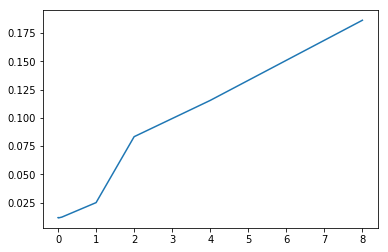

In [39]:
plt.plot(reg, regData) 

In [40]:
sc.stop()